---
Stellen Sie bitte sicher, dass alles wie vorhergesehen läuft, bevor Sie dieses Übungsblatt abgeben. **Starten Sie den Kernel neu** (in der Menüleiste die Option Kernel$\rightarrow$Restart auswählen) und **validieren** Sie anschließend das Übungsblatt (in der Menüleiste auf Validate klicken) um Rückmeldung zu eventuellen fehlenden oder fehlerhaften Eingaben zu erhalten. 

Füllen Sie alle Stellen im Übungsblatt aus, welche entweder `DEIN CODE HIER` oder "DEINE ANTWORT HIER" enthalten. Geben Sie unterhalb Ihren vollständigen Namen an.

Wenn Sie Code-Bestandteile aus anderen Quellen (wie z.B. Stackoverflow) kopieren, dann machen sie den kopierten Code in ihrer Quellcodedatei kenntlich und fügen eine Referenz auf die Quelle als Kommentar hinzu.

Wenn Sie die Aufgaben in einer Gruppe erledigen, dann fügen Sie die Namen aller Gruppenmitglieder in der nachfolgende Zelle zu `Name` und zusätzlich als Kommentar am Anfang Ihrer Quellcodedatei hinzu.

---

In [ ]:
NAME = "Gernot Luidolt"

---

<table style="width: 100%">
    <tr style="background: #ffffff">
        <td style="padding-top:25px;width: 180px">
            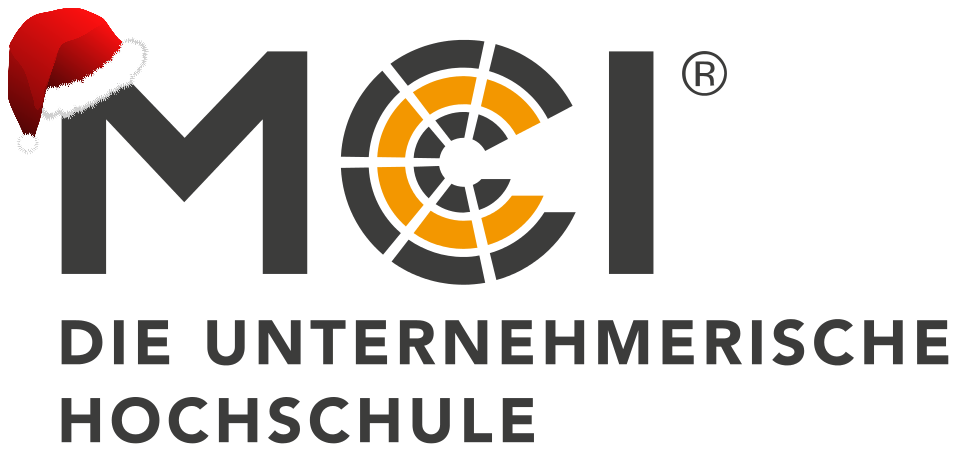</td>
        <td style="width: 100%">
            <div style="text-align:right; width: 100%; text-align:right"><font style="font-size:38px"><b>Methoden der Softwareentwicklung I</b></font></div>
            <div style="padding-top:0px; width: 100%; text-align:right"><font size="4"><b>WS 2023/24</b></font></div>
        </td>
    </tr>
</table>

In [ ]:
import jagl
import os
import shutil

---
# Übungsblatt 4

---
Abgabe bis <b>Sonntag, 07. Jänner 2024, 23:55 Uhr</b>

---
### Achtung:

*Bitte speichern Sie Ihre Quellcode-Dateien (&ast;.c) im selben Ordner wie dieses Übungsblatt. Beachten Sie außerdem die Kommentare zur richtigen Benennung Ihrer Dateien. Nur so ist eine korrekte Abgabe und Auswertung Ihrer Lösungen möglich.*

---
* Bitte verwenden Sie für Ihre Lösungen einen ordentlichen Programmierstil. Vor allem auf eine korrekte Formatierung, aussagekräftige Variablennamen und ausführliche Kommentare sollte dabei Wert gelegt werden.

* Vergessen Sie nie, den Erfolg von Systemoperationen (z.B. Datei öffnen) zu überprüfen, und gegebenenfalls das Programm mit einer aussagekräftigen Fehlermeldung zu beenden.

* Schließen Sie Ressourcen wie z.B. Dateien immer sofort, sobald sie nicht mehr benötigt werden.

*__Hinweis:__ Es ist erlaubt für dieses Übungsblatt Funktionen der Standard-Bibliothek "string.h" zu verwenden*

In [ ]:
# new test suite
jagl.testsuite_begin("Exercise 1")

# delete all build artifacts
jagl.remove_paths(files=["integers", "*.o", "integers_output.txt"])

---
## 4.1 Ausgabe in Datei (33%)

Implementieren Sie ein Programm welches zeilenweise von der Kommandozeile einliest, dabei alle Zahlen aus der Eingabe filtert und diese dann in eine Datei "integers_output.txt" schreibt (führende Nullen dürfen nicht gelöscht werden). Als Zahlen werden hierbei alle Ziffernfolgen angesehen (d.h. Die Eingabe `4,5` würde in die Zahlen `4` und `5` aufgeteilt werden). Es sollen solange Zeilen eingelesen werden, bis eine leere Zeile eingegeben wird. Hier ein Beispiel für einen möglichen Programmablauf:<br/>

`> Geben Sie Ihren Text ein:`<br/>
&nbsp;&nbsp;&nbsp;&nbsp;`Im Jahr 2019 haben bereits 50 Studenten mehr als 2h gelernt.`<br/>
&nbsp;&nbsp;&nbsp;&nbsp;`23 davon sogar länger als 4,5h.`<br/>
&nbsp;&nbsp;&nbsp;&nbsp;`Viele lernten erst eine Stunde lang.`<br/>
&nbsp;&nbsp;&nbsp;&nbsp;`Niemand lernte mehr als 10h.`<br/>
&nbsp;&nbsp;&nbsp;&nbsp;``<br/>
`> Ende der Eingabe erreicht.`<br/>

Die Ausgabedatei sollte für obige Eingabe exakt so aussehen:<br/>
`2019 50 2`<br/>
`23 4 5`<br/>
``<br/>
`10`<br/>

Die gefundenen Zahlen aus jeder Eingabezeile sollen also durch ein Leerzeichen getrennt in die entsprechende Zeile der Ausgabedatei geschrieben werden. Wird in einer Eingabezeile keine Zahl gefunden, so soll in der Ausgabedatei stattdessen eine leere Zeile eingefügt werden.

Implementieren Sie Ihr Programm in der Datei `integers.c`.

In [ ]:
%%bash

# Schreiben Sie in diese Zelle den Befehl der dafür nötig ist um Ihr Programm zu kompilieren.
# Beachten Sie dabei, dass der Name ihrer Quellcode-Datei "integers.c" sein sollte.
# Beachten Sie dabei, dass der Name Ihres ausführbaren Programms "integers" sein sollte.
# Beachten Sie dabei, dass der Name Ihrer Ausgabedatei "integers_output.txt" sein sollte.

gcc -Wall -Werror -o integer integer.c

In [ ]:
# Weisen Sie der untenstehenden Variable den Wert True zu, sobald Sie die Aufgabe erfolgreich erledigt haben!

# Datentyp: bool
exercise_4_1_solved = True

In [ ]:
executable_name = "integers"
source_files = ["integers.c"]
cpp_flags = []

In [ ]:
@jagl.testcase("1", desc="Exercise Solved")
def testcase_1_1(result, suite, case):
    varname = "exercise_4_1_solved"
    result.setSucceeded()
    jagl.check_variable_exists_and_has_type(result, globals(), varname, bool)
    if result.isSucceeded():
        if eval(varname):
            result.setSucceeded("Exercise solved.")
        else:
            result.setFailed("Exercise not solved.")

In [ ]:
@jagl.testcase("2", desc="Compiling program", deps=["1"])
def testcase_1_2(result, suite, case):
    if os.path.isfile(executable_name):
        result.setSucceeded("The program could be compiled successfully.")
        
    else:
        res = jagl.exec_bin("gcc", ["-o", executable_name] + source_files + cpp_flags)
        if res.state == jagl.ExecutionResult.SUCCESS:
            stdout = jagl.bytes_decode(res.stdout).strip()
            stderr = jagl.bytes_decode(res.stderr).strip()
            if res.exitCode == 0:
                if os.path.isfile(executable_name):
                    result.setSucceeded("The program could be compiled successfully.")
                else:
                    result.setFailed("gcc was executed successfully, but I couldn't find an executable.")
                if len(stderr) > 0:
                    result.setSucceeded(["However, there were warnings."] + stderr.split("\n"))
            else:
                result.setFailed(["The program could not be compiled:"] + stderr.split("\n"))
        elif res.state == jagl.ExecutionResult.NOTFOUND:
            result.setFailed("gcc could not be found. Please inform your course instructor.")
        elif res.state == jagl.ExecutionResult.TIMEOUT:
            result.setFailed("Timeout while calling gcc. Please inform your course instructor.")
        elif res.state == jagl.ExecutionResult.ERROR:
            result.setFailed(f'Unknown error during execution of gcc: {str(res.error)}. Please inform your course instructor.')

In [ ]:
@jagl.testcase("3", desc="Executing program", deps=["2"])
def testcase_1_3(result, suite, case):
    execresult = jagl.exec_bin("./" + executable_name, [], "Hallo 123 Welt 45!\n67 bla 89\n\n", timeout = 30)
    jagl.check_execution_result(result, execresult, checkExitCode = False)
    if execresult.exitCode is not None:
        if execresult.exitCode == -11:
            result.setFailed("Program caused a segmentation fault.")
        elif execresult.exitCode < 0:
            result.setFailed(f"Program was abnormally terminated (Signal: {-execresult.exitCode})")
        elif execresult.exitCode > 0:
            result.setFailed(f"Program returned an exit code other than 0 (Exit Code: {execresult.exitCode})")

---
## 4.2 Strukturen (25%)

Im Ordner dieses Übungsblattes finden die die Datei "persons_input.txt". In dieser Datei finden sich Datensätze für Personen in folgender Form: `Vorname;Nachname;Alter;Hobbies`. Dabei kann eine Person bis zu 5 `Hobbies` haben, die durch `,` getrennt sind. Hier ein beispielhafter Datensatz: `Max;Mustermann;21;Rodeln,Musik,Kochen`. Die einzelnen Datensätze sind durch Zeilenumbrüche voneinander getrennt. 

Ihre Aufgabe ist es, alle Datensätze aus der Datei einzulesen und in eine dafür geeignete Struktur zu speichern. Anschließend geben Sie bitte die Nachnamen aller Personen aus, die zwischen `20` und (inklusive) `30` Jahre alt sind und die `Tanzen` zu ihren Hobbies zählen.

Sie können davon ausgehen, dass die einzulesende Datei nicht mehr als 20 Zeilen mit Daten beinhaltet. Sie sollten allerdings nie blind davon ausgehen, sondern auch entsprechende Schutzmechanismen integrieren, falls die Datei doch mehr Zeilen enthaltet. In diesem Fall sollte Ihr Programm nicht abstürzen oder sonstiges undefiniertes Verhalten zeigen, sie können aber die zusätzlichen Zeilen ignorieren. 

Desweiteren sollten Sie auch nie darauf vertrauen, dass die Struktur der Daten immer korrekt ist, sondern Schutzmaßnahmen implementieren, die dafür sorgen, dass Ihr Programm nicht abstürzen oder sonstiges undefiniertes Verhalten zeigen, wenn die Struktur der Daten nicht korrekt ist.

Implementieren Sie Ihr Programm in der Datei `persons.c`.

In [ ]:
# new test suite
jagl.testsuite_begin("Exercise 2")

# delete all build artifacts
jagl.remove_paths(files=["persons", "*.o"])

In [ ]:
%%bash

# Schreiben Sie in diese Zelle den Befehl der dafür nötig ist um Ihr Programm zu kompilieren.
# Beachten Sie dabei, dass der Name ihrer Quellcode-Datei "persons.c" sein sollte.
# Beachten Sie dabei, dass der Name Ihres ausführbaren Programms "persons" sein sollte.

gcc -Wall -Werror -o persons persons.c

In [ ]:
# Weisen Sie der untenstehenden Variable den Wert True zu, sobald Sie die Aufgabe erfolgreich erledigt haben!

# Datentyp: bool
exercise_4_2_solved = True

In [ ]:
executable_name = "persons"
source_files = ["persons.c"]
cpp_flags = []

In [ ]:
@jagl.testcase("1", desc="Exercise Solved")
def testcase_2_1(result, suite, case):
    varname = "exercise_4_2_solved"
    result.setSucceeded()
    jagl.check_variable_exists_and_has_type(result, globals(), varname, bool)
    if result.isSucceeded():
        if eval(varname):
            result.setSucceeded("Exercise solved.")
        else:
            result.setFailed("Exercise not solved.")

In [ ]:
@jagl.testcase("2", desc="Compiling program", deps=["1"])
def testcase_1_2(result, suite, case):
    if os.path.isfile(executable_name):
        result.setSucceeded("The program could be compiled successfully.")
        
    else:
        res = jagl.exec_bin("gcc", ["-o", executable_name] + source_files + cpp_flags)
        if res.state == jagl.ExecutionResult.SUCCESS:
            stdout = jagl.bytes_decode(res.stdout).strip()
            stderr = jagl.bytes_decode(res.stderr).strip()
            if res.exitCode == 0:
                if os.path.isfile(executable_name):
                    result.setSucceeded("The program could be compiled successfully.")
                else:
                    result.setFailed("gcc was executed successfully, but I couldn't find an executable.")
                if len(stderr) > 0:
                    result.setSucceeded(["However, there were warnings."] + stderr.split("\n"))
            else:
                result.setFailed(["The program could not be compiled:"] + stderr.split("\n"))
        elif res.state == jagl.ExecutionResult.NOTFOUND:
            result.setFailed("gcc could not be found. Please inform your course instructor.")
        elif res.state == jagl.ExecutionResult.TIMEOUT:
            result.setFailed("Timeout while calling gcc. Please inform your course instructor.")
        elif res.state == jagl.ExecutionResult.ERROR:
            result.setFailed(f'Unknown error during execution of gcc: {str(res.error)}. Please inform your course instructor.')

In [ ]:
@jagl.testcase("3", desc="Executing program", deps=["2"])
def testcase_1_3(result, suite, case):
    execresult = jagl.exec_bin("./" + executable_name, timeout = 30)
    jagl.check_execution_result(result, execresult, checkExitCode = False)
    if execresult.exitCode is not None:
        if execresult.exitCode == -11:
            result.setFailed("Program caused a segmentation fault.")
        elif execresult.exitCode < 0:
            result.setFailed(f"Program was abnormally terminated (Signal: {-execresult.exitCode})")
        elif execresult.exitCode > 0:
            result.setFailed(f"Program returned an exit code other than 0 (Exit Code: {execresult.exitCode})")

---
## 4.3 Rechner (25%)

Im Rahmen von Aufgabe 2.2 von Übungsblatt 2 haben Sie bereits einen Rechner implementiert, welcher zwei Zahlen und die dazugehörige Operation via Kommandozeilenparameter eingelesen und verarbeitet hat. Für diese Aufgabe sollen Sie ein Programm implementieren, welches die gewünschten Daten von `stdin` einliest. Außerdem soll das Programm in der Lage sein beliebig oft Berechnungen durchzuführen, bis es zu einem Abbruch von Seiten des Benutzers kommt. Hier ein beispielhafter Programmablauf:<br/>

`> Geben Sie Zahl 1 ein:`<br/>
12<br/>
`> Geben Sie die Operation ein:`<br/>
+<br/>
`> Geben Sie Zahl 2 ein:`<br/>
5<br/>
`> Ergebnis: 17`<br/>
`> Geben Sie Zahl 1 ein:`<br/>
43<br/>
`> Geben Sie die Operation ein:`<br/>
blabla<br/>
`> Falsche Eingabe!`<br/>
`> Geben Sie Zahl 1 ein:`<br/>
7<br/>
`> Geben Sie die Operation ein:`<br/>
/<br/>
`> Geben Sie Zahl 2 ein:`<br/>
2<br/>
`> Ergebnis: 3.5`<br/>
`> Geben Sie Zahl 1 ein:`<br/>
exit<br/>
`> Rechner wird geschlossen`<br/>
<br/>

Was gibt es zu beachten:<br/>
* Der Benutzer soll seine Daten exakt nach dem obigen Schema eingeben können.
* Bei Eingabe von `exit` soll der Rechner jederzeit beendet werden können (Sollte dies nicht funktionieren, kann es zu Schwierigkeiten beim automatischen Testen Ihres Rechners kommen).
* Der Rechner soll die Operationen `+`,`-`,`*` und `/` für Integer unterstützen.
* Bei einer Division kann es zu einer Dezimalzahl (z.B. 3,5) als Ergebnis kommen.
* Kommt es zu einer Eingabe, welche nicht den Erwartungen enspricht (kein Integer oder keine Rechenoperation), dann soll eine Fehlermeldung auf `stderr` ausgegeben werden (**Wichtig**: Dabei müssen die Worte `Falsche Eingabe` verwendet werden). Die Programmausführung soll dabei jedoch nicht abgebrochen werden, stattdessen soll der Benutzer wieder dazu aufgefordert werden die erste Zahl für eine neue Berechnung einzugeben.
* Sie können gerne Ihre Quellcode- bzw. Header-Dateien aus Übung 2.2 wiederverwenden.


Implementieren Sie Ihr Programm in der Datei `calculator.c`. Wenn Sie Quellcode-Dateien aus früheren Übungen direkt weiterverwenden, ist es wichtig, dass Sie in die untere Zelle einen korrekten Befehl zum kompilieren eingeben, da sonst die automatischen Tests nicht funktionieren.

In [ ]:
# new test suite
jagl.testsuite_begin("Exercise 3")

# delete all build artifacts
jagl.remove_paths(files=["calculator", "*.o"])

In [ ]:
%%bash

# Schreiben Sie in diese Zelle den Befehl der dafür nötig ist um Ihr Programm zu kompilieren.
# Beachten Sie dabei, dass der Name ihrer Quellcode-Datei "calculator.c" sein sollte.
# Beachten Sie dabei, dass der Name Ihres ausführbaren Programms "calculator" sein sollte.

gcc -Wall -Werror -o calculator calculator.c

In [ ]:
# Weisen Sie der untenstehenden Variable den Wert True zu, sobald Sie die Aufgabe erfolgreich erledigt haben!

# Datentyp: bool
exercise_4_3_solved = True

In [ ]:
executable_name = "calculator"
source_files = ["calculator.c"]
cpp_flags = []

In [ ]:
@jagl.testcase("1", desc="Exercise Solved")
def testcase_3_1(result, suite, case):
    varname = "exercise_4_3_solved"
    result.setSucceeded()
    jagl.check_variable_exists_and_has_type(result, globals(), varname, bool)
    if result.isSucceeded():
        if eval(varname):
            result.setSucceeded("Exercise solved.")
        else:
            result.setFailed("Exercise not solved.")

In [ ]:
@jagl.testcase("2", desc="Compiling program", deps=["1"])
def testcase_3_2(result, suite, case):
    if os.path.isfile(executable_name):
        result.setSucceeded("The program could be compiled successfully.")
        
    else:
        res = jagl.exec_bin("gcc", ["-o", executable_name] + source_files + cpp_flags)
        if res.state == jagl.ExecutionResult.SUCCESS:
            stdout = jagl.bytes_decode(res.stdout).strip()
            stderr = jagl.bytes_decode(res.stderr).strip()
            if res.exitCode == 0:
                if os.path.isfile(executable_name):
                    result.setSucceeded("The program could be compiled successfully.")
                else:
                    result.setFailed("gcc was executed successfully, but I couldn't find an executable.")
                if len(stderr) > 0:
                    result.setSucceeded(["However, there were warnings."] + stderr.split("\n"))
            else:
                result.setFailed(["The program could not be compiled:"] + stderr.split("\n"))
        elif res.state == jagl.ExecutionResult.NOTFOUND:
            result.setFailed("gcc could not be found. Please inform your course instructor.")
        elif res.state == jagl.ExecutionResult.TIMEOUT:
            result.setFailed("Timeout while calling gcc. Please inform your course instructor.")
        elif res.state == jagl.ExecutionResult.ERROR:
            result.setFailed(f'Unknown error during execution of gcc: {str(res.error)}. Please inform your course instructor.')

In [ ]:
@jagl.testcase("3", desc="Executing program", deps=["2"])
def testcase_3_3(result, suite, case):
    execresult = jagl.exec_bin("./" + executable_name, [], "33\n+\n42\n71\n*\n32\nexit\n", timeout = 30)
    jagl.check_execution_result(result, execresult, checkExitCode = False)
    if execresult.exitCode is not None:
        if execresult.exitCode == -11:
            result.setFailed("Program caused a segmentation fault.")
        elif execresult.exitCode < 0:
            result.setFailed(f"Program was abnormally terminated (Signal: {-execresult.exitCode})")
        elif execresult.exitCode > 0:
            result.setFailed(f"Program returned an exit code other than 0 (Exit Code: {execresult.exitCode})")

In [ ]:
# new test suite
jagl.testsuite_begin("Exercise 4")

# delete all build artifacts
jagl.remove_paths(files=["xmas_sort_test", "*.o"])


---
## 4.4  Sortieren von Geschenken (25%)

Man stelle sich einen Weihnachtswichtel vor, welcher vor n Geschenken steht, die unterschiedliche Größen haben dürfen. Die Geschenke sind in einer von links nach rechts verlaufenden Reihe aufgestellt. Ganz links steht der Weihnachtswichtel und möchte die Geschenke von links nach rechts der Größe nach aufsteigend sortieren. Dazu vergleicht er die beiden Geschenke, vor denen er gerade steht. Stellt er fest, dass sie in der richtigen Reihenfolge sind, so macht er einen Schritt nach rechts. Stellt er hingegen fest, dass die Reihenfolge nicht stimmt, so vertauscht er die beiden Geschenke und macht einen Schritt nach links. Falls er nicht weiter nach links gehen kann (wenn beispielsweise der erste Vergleich zum Ergebnis führte, dass sich das erste und zweite Geschenk in der falschen Reihenfolge befanden), macht er einen Schritt nach rechts. Dies wiederholt er ständig. Fertig ist er, wenn er am ganz rechts stehenden Geschenk ankommt. Da sich rechts daneben kein weiteres Geschenk mehr befindet, kann kein Vergleich mehr stattfinden.

<img style="width: 220px" src="https://www.canalgif.net/Gifs-animados/Navidad/Regalos-de-navidad/Imagen-animada-Regalos-de-navidad-78.gif" alt="presents">

Implementieren Sie den Sortieralgorithmus, der hier beschrieben ist. Die n Geschenke sollen dabei n Integer sein. Im Ordner dieses Übungsblattes finden Sie die Datei `xmas_sort.h`, welche die Funktionsdeklaration für diesen Algorithmus enthält. Ihre Implementierung soll in der Datei `xmas_sort.c` erfolgen. Die Funktion sollen anschließend durch Einbindung der Header-Datei `xmas_sort.h` in jedem beliebigen C-Programm verwendbar sein (selbe Vorgehensweise wie bei Übungsaufgabe 3.3, auch hier sollte wieder **keine main()-Funktion** enthalten sein). Sie können (und sollten) dies selbstverständlich testen, für die Abgabe ist jedoch nur die Datei `xmas_sort.c` relevant. Achten Sie darauf, dass Ihre Abgabe kompilierbar und ausführbar ist, nur so können dafür Punkte vergeben werden. Änderungen an der Datei `xmas_sort.h` sind nicht gestattet. Die Datei `xmas_sort_test.c`, die Sie auch im Ordner des Übungszettel finden, wird von den Validier-Funktion benötigt, um Ihre Abgabe zu testen.

In [4]:
%%bash

gcc xmas_sort_test.c xmas_sort.c -o xmas_sort_test

In [11]:
# Weisen Sie der untenstehenden Variable den Wert True zu, sobald Sie die Aufgabe erfolgreich erledigt haben!

# Datentyp: bool
exercise_4_4_solved = True

In [ ]:
executable_name = "xmas_sort_test"
source_files = ["xmas_sort_test.c", "xmas_sort.c"]
cpp_flags = []

In [ ]:
@jagl.testcase("1", desc="Exercise Solved")
def testcase_4_1(result, suite, case):
    varname = "exercise_4_4_solved"
    result.setSucceeded()
    jagl.check_variable_exists_and_has_type(result, globals(), varname, bool)
    if result.isSucceeded():
        if eval(varname):
            result.setSucceeded("Exercise solved.")
        else:
            result.setFailed("Exercise not solved.")

In [ ]:
@jagl.testcase("2", desc="Compiling program", deps=["1"])
def testcase_4_2(result, suite, case):
    if os.path.isfile(executable_name):
        result.setSucceeded("The program could be compiled successfully.")
        
    else:
        res = jagl.exec_bin("gcc", ["-o", executable_name] + source_files + cpp_flags)
        if res.state == jagl.ExecutionResult.SUCCESS:
            stdout = jagl.bytes_decode(res.stdout).strip()
            stderr = jagl.bytes_decode(res.stderr).strip()
            if res.exitCode == 0:
                if os.path.isfile(executable_name):
                    result.setSucceeded("The program could be compiled successfully.")
                else:
                    result.setFailed("gcc was executed successfully, but I couldn't find an executable.")
                if len(stderr) > 0:
                    result.setSucceeded(["However, there were warnings."] + stderr.split("\n"))
            else:
                result.setFailed(["The program could not be compiled:"] + stderr.split("\n"))
        elif res.state == jagl.ExecutionResult.NOTFOUND:
            result.setFailed("gcc could not be found. Please inform your course instructor.")
        elif res.state == jagl.ExecutionResult.TIMEOUT:
            result.setFailed("Timeout while calling gcc. Please inform your course instructor.")
        elif res.state == jagl.ExecutionResult.ERROR:
            result.setFailed(f'Unknown error during execution of gcc: {str(res.error)}. Please inform your course instructor.')

In [ ]:
@jagl.testcase("3", desc="Executing program", deps=["2"])
def testcase_4_3(result, suite, case):
    execresult = jagl.exec_bin("./" + executable_name, [], None, timeout = 30)
    jagl.check_execution_result(result, execresult, checkExitCode = False)
    if execresult.exitCode is not None:
        if execresult.exitCode == -11:
            result.setFailed("Program caused a segmentation fault.")
        elif execresult.exitCode < 0:
            result.setFailed("Program was abnormally terminated (Signal: {})".format(-execresult.exitCode))